In [1]:
!pip install pandas
!pip install catboost

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold
from catboost import CatBoostClassifier

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

file_path = 'Train (1).csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.shape


(10999, 12)

In [3]:
print(data.isnull().sum())
data.head(-10)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10984,10985,C,Ship,5,1,257,5,medium,M,1,1102,1
10985,10986,F,Ship,5,1,229,5,low,F,10,1040,1
10986,10987,D,Ship,4,5,255,5,medium,M,5,1458,1
10987,10988,F,Ship,5,3,242,5,low,F,10,1846,1


In [4]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [5]:
for column in data.columns:
    unique_values=data[column].unique()
    data_type = data[column].dtype
    print(column,unique_values)
    print(column,data_type)
    

ID [    1     2     3 ... 10997 10998 10999]
ID int64
Warehouse_block ['D' 'F' 'A' 'B' 'C']
Warehouse_block object
Mode_of_Shipment ['Flight' 'Ship' 'Road']
Mode_of_Shipment object
Customer_care_calls [4 2 3 5 6 7]
Customer_care_calls int64
Customer_rating [2 5 3 1 4]
Customer_rating int64
Cost_of_the_Product [177 216 183 176 184 162 250 233 150 164 189 232 198 275 152 227 143 239
 145 161 156 211 251 225 172 234 266 257 223 149 137 181 215 269 139 174
 151 210 169 160 190 141 165 170 203 246 238 193 221 179 105 261 202 109
 158 231 206 187 230 113 180 132 217 197 185 278 229 186 286 175 219 213
 235 271 144 218 263 168 265 205 252 222 220 147 200 224 247 280 157 207
 237 264 248 191 146 135  98  97 114 112 274 166 148 270 242 192 116 255
 209 134 130 133 140 136 142 154 155 127 129 159 294 226 258 241 208 182
 115 212 171 249 243 163 272 138 273 279 173 194 262 201 260 188 267 131
 122 103 199 236 167 259 178 123 124  96 244 254 128 204 245 228 268 108
 276 214 281 253 104 240 121 153

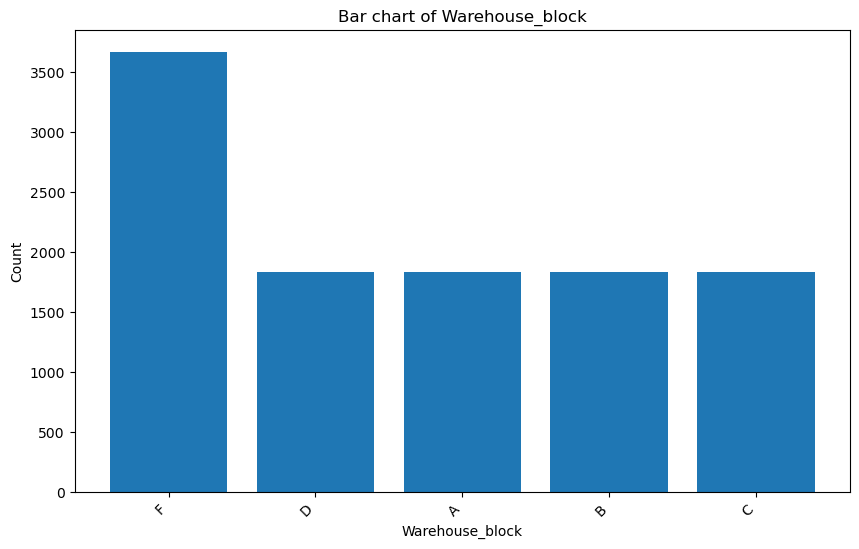

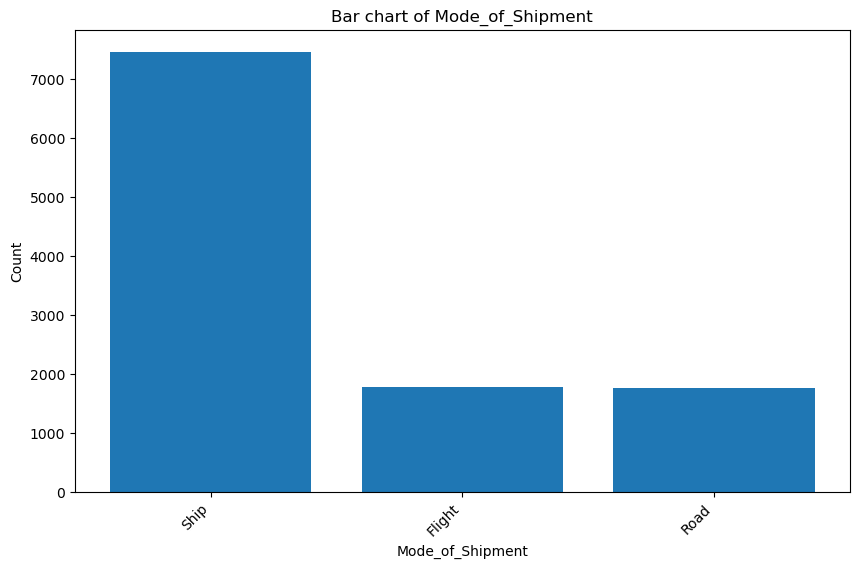

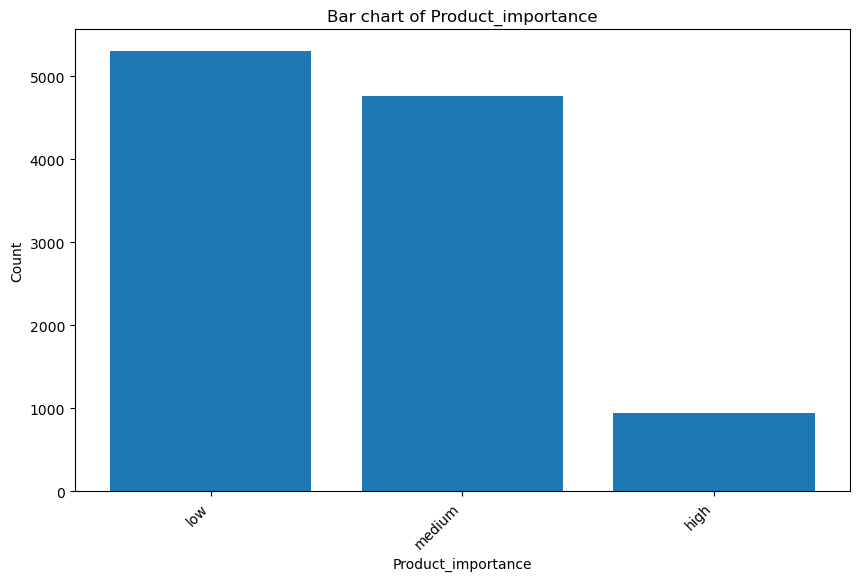

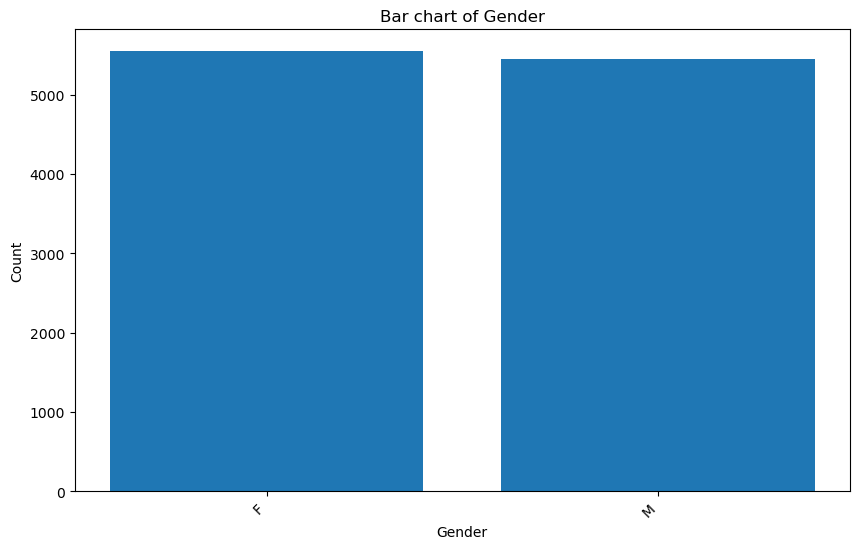

In [6]:
for column in data.columns:
    if data[column].dtype == 'object':
        
        value_counts = data[column].value_counts()
        
        plt.figure(figsize=(10, 6))
        plt.bar(value_counts.index, value_counts.values)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar chart of {column}')
        plt.xticks(rotation=45, ha='right')
        plt.show()

## Important insites 
- Most of the products are stored in the F block.
- Shipping is the most commonly used mode of shipment compared to road and air.
- Highly important products have the lowest demand, with under 1000 shipments. 

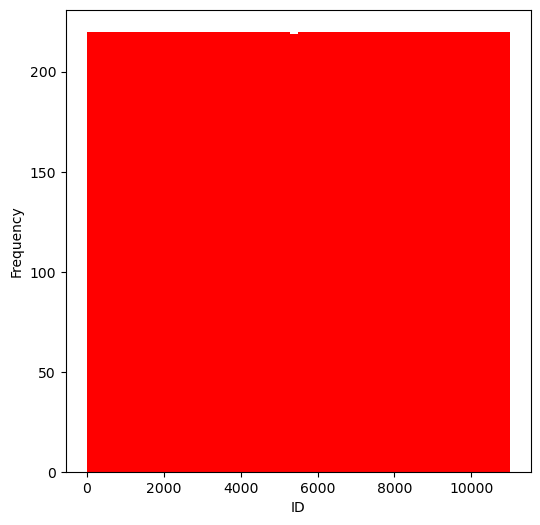

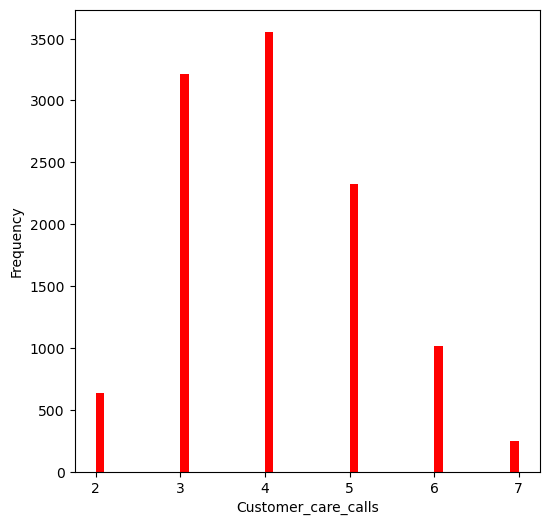

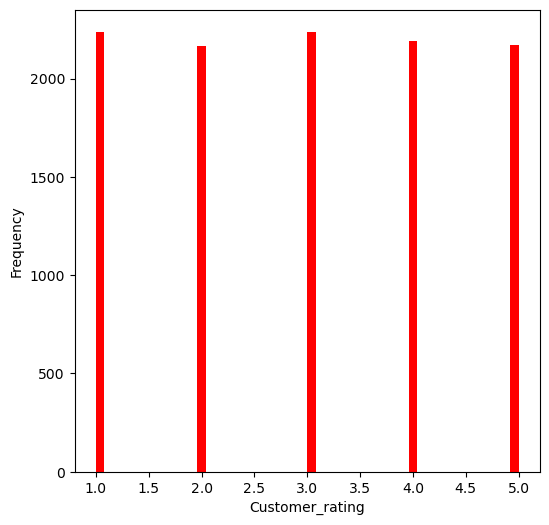

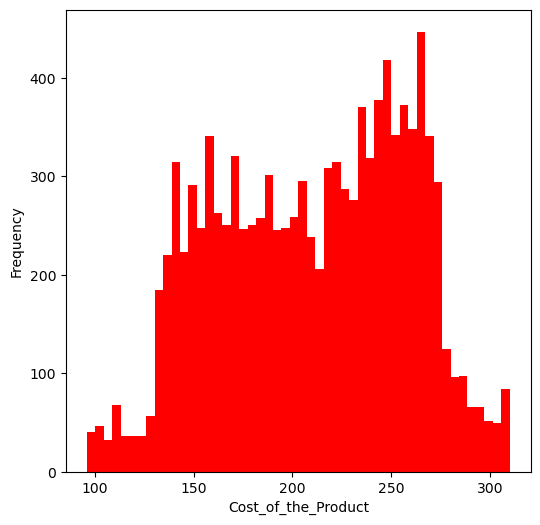

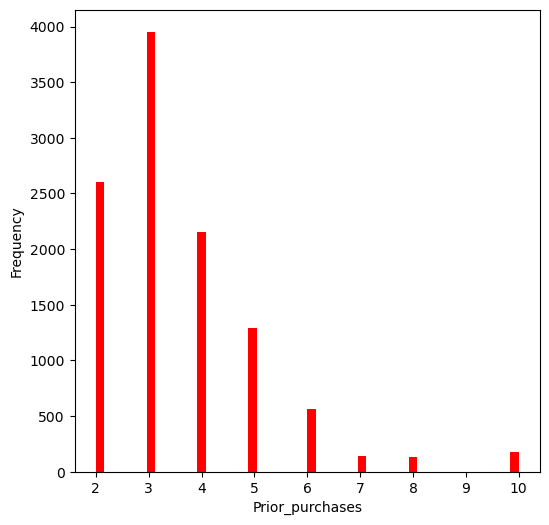

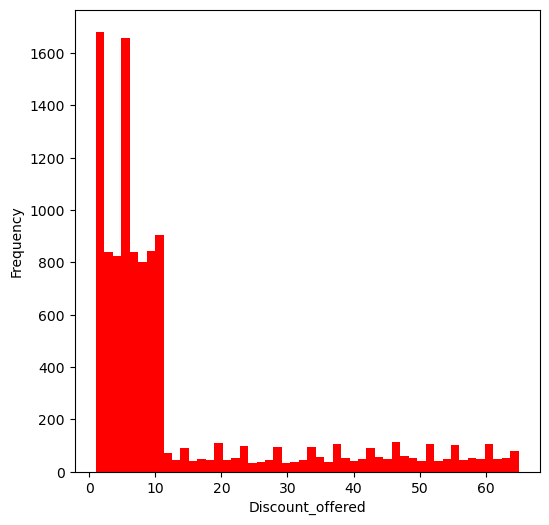

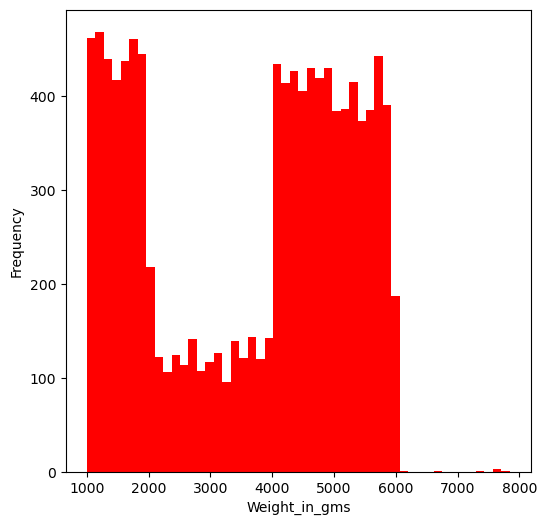

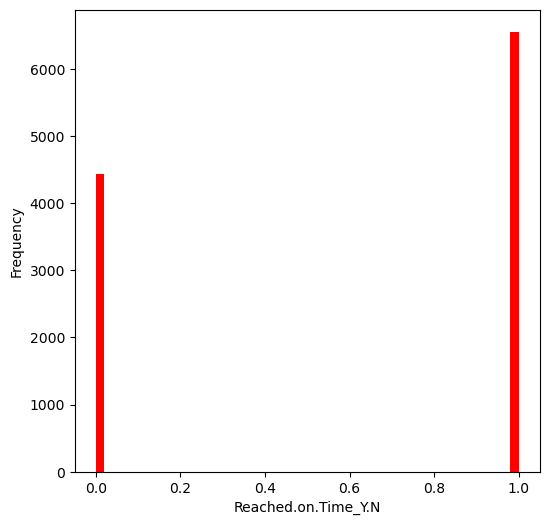

In [7]:
for column in data.columns:
    if data[column].dtype=='int' or data[column].dtype=='float':
        plt.figure(figsize=(6,6))
        plt.hist(data[column],bins=50,color='red')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
                   
            
    

- Majority of customers have prior purchases of less than 6. Repeat customers have not been effectively retained.
- Most products being purchased are at a discount of 10 percent or lower.
- Customer care calls are higher in number than the industrial average.

/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_63477/3240779358.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


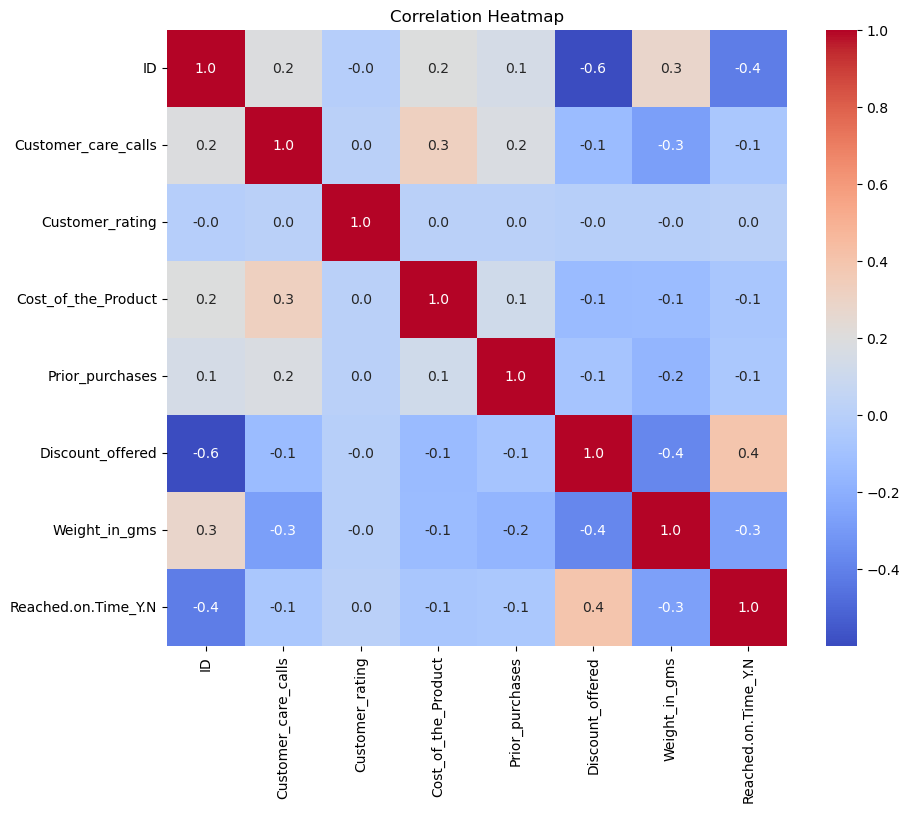

In [8]:
corr_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()


## Points
- The discount offered on a product has a positive correlation with products not reaching on time.
- The discount offered on a product has a negative correlation with the product's weight.
- The number of customer care calls has a negative correlation with the weight of the product.
- The number of customer care calls has a positive correlation with the cost of the product.

In [9]:
'''for column in data.columns:
    if data[column].dtype=='object':
        data = pd.get_dummies(data, columns=[column])'''
        

"for column in data.columns:\n    if data[column].dtype=='object':\n        data = pd.get_dummies(data, columns=[column])"

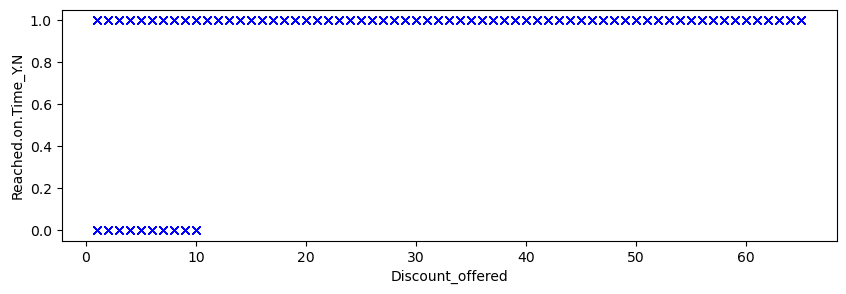

In [10]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=data,x= 'Discount_offered',y='Reached.on.Time_Y.N',marker='x',color='blue')
plt.xlabel('Discount_offered')
plt.show()


In [11]:
df1=data.groupby(['Reached.on.Time_Y.N']).agg({'Discount_offered':['max','count']})
    
df1

Discount_offered      
                                 max count
Reached.on.Time_Y.N                       
0                                 10  4436
1                                 65  6563

In [12]:
j=0
u=0
o=0
x=0
for i in range(10999):
    if data['Discount_offered'].iloc[i]<=10 and data['Reached.on.Time_Y.N'].iloc[i]==1:
        o=o+1
    elif data['Discount_offered'].iloc[i]<=10 and data['Reached.on.Time_Y.N'].iloc[i]==0:
        j=j+1
    elif data['Discount_offered'].iloc[i]>10 and data['Reached.on.Time_Y.N'].iloc[i]==0:
        u=u+1
    elif data['Discount_offered'].iloc[i]>10 and data['Reached.on.Time_Y.N'].iloc[i]==1:
        x=x+1
print("Number of product under 10% discount delivered NOt on time under : ",o,"\nNumber of product under 10% discount delivered ON time under : ",j,"\nNumber of product MORE than 10% discount delivered ON time under : ",u,"\nNumber of product MORE 10% discount delivered NOT on time under : ",x)        
print(f'Total number of product in the data: ',o+j+u+x)
        

Number of product under 10% discount delivered NOt on time under :  3916 
Number of product under 10% discount delivered ON time under :  4436 
Number of product MORE than 10% discount delivered ON time under :  0 
Number of product MORE 10% discount delivered NOT on time under :  2647
Total number of product in the data:  10999


## Important Points 
- All products with a discount offer greater than 10% are always not reaching on time.
- Below a 10% discount, the probability of delivering products is almost 50%.

/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_63477/1331880626.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=data, x='Discount_offered', y='Weight_in_gms', palette=['skyblue', 'salmon'], s=10)


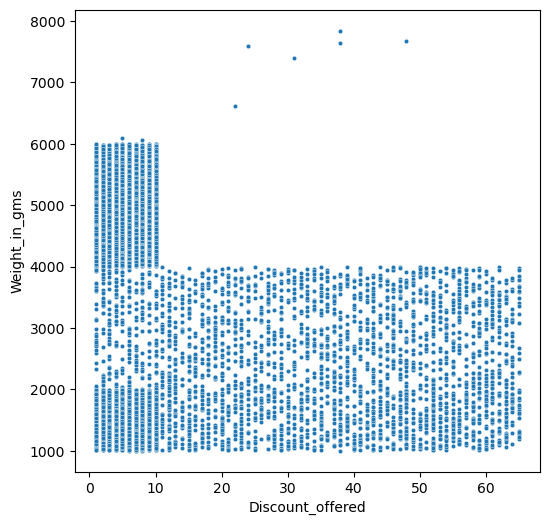

In [13]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=data, x='Discount_offered', y='Weight_in_gms', palette=['skyblue', 'salmon'], s=10)
plt.show()

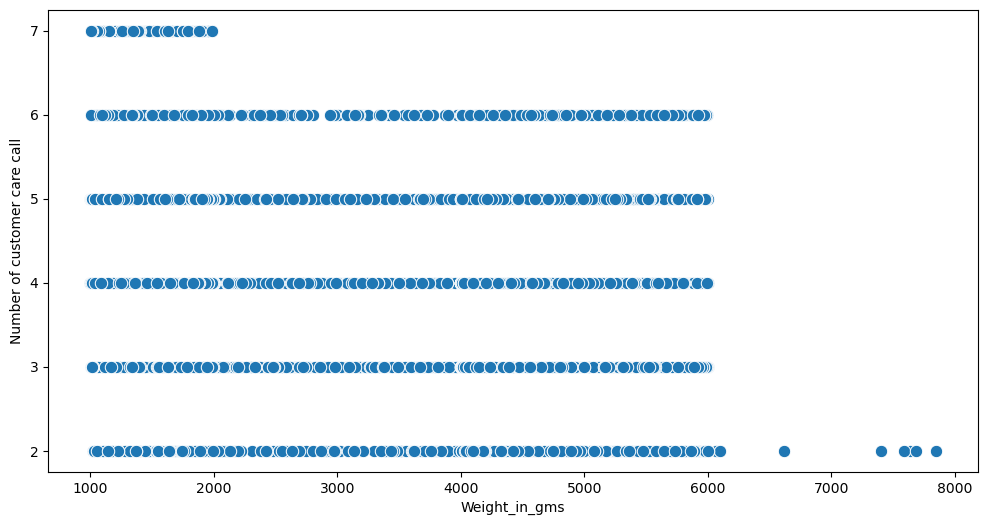

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='Weight_in_gms',y='Customer_care_calls',s=80)
plt.xlabel('Weight_in_gms')
plt.ylabel('Number of customer care call')
plt.show()

In [15]:
df2=data.groupby('Customer_care_calls').agg({'Weight_in_gms':['max','count']})
df2

Weight_in_gms      
                              max count
Customer_care_calls                    
2                            7846   638
3                            6000  3217
4                            6000  3557
5                            6000  2328
6                            5992  1013
7                            1989   246

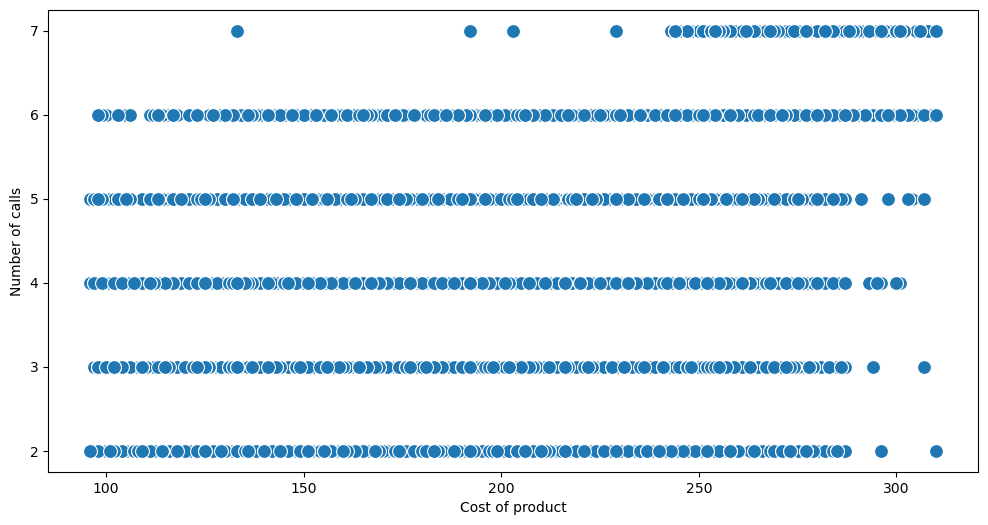

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data,x='Cost_of_the_Product',y='Customer_care_calls',s=100)
plt.xlabel('Cost of product')
plt.ylabel('Number of calls')
plt.show()

## Points
- Apart from outliers, every product with a discount of more than 10% weighs less than 4000 grams. Therefore, products weighing more than 4000 grams are not offered more than a 10% discount.
- Seven calls regarding customer care are only for products weighing less than 2000 grams.

In [17]:
data_1 = data.copy()
for column in data.columns:
    if data[column].dtype=='object':
        data_1 = pd.get_dummies(data_1, columns=[column])

data_1.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0


<Axes: >

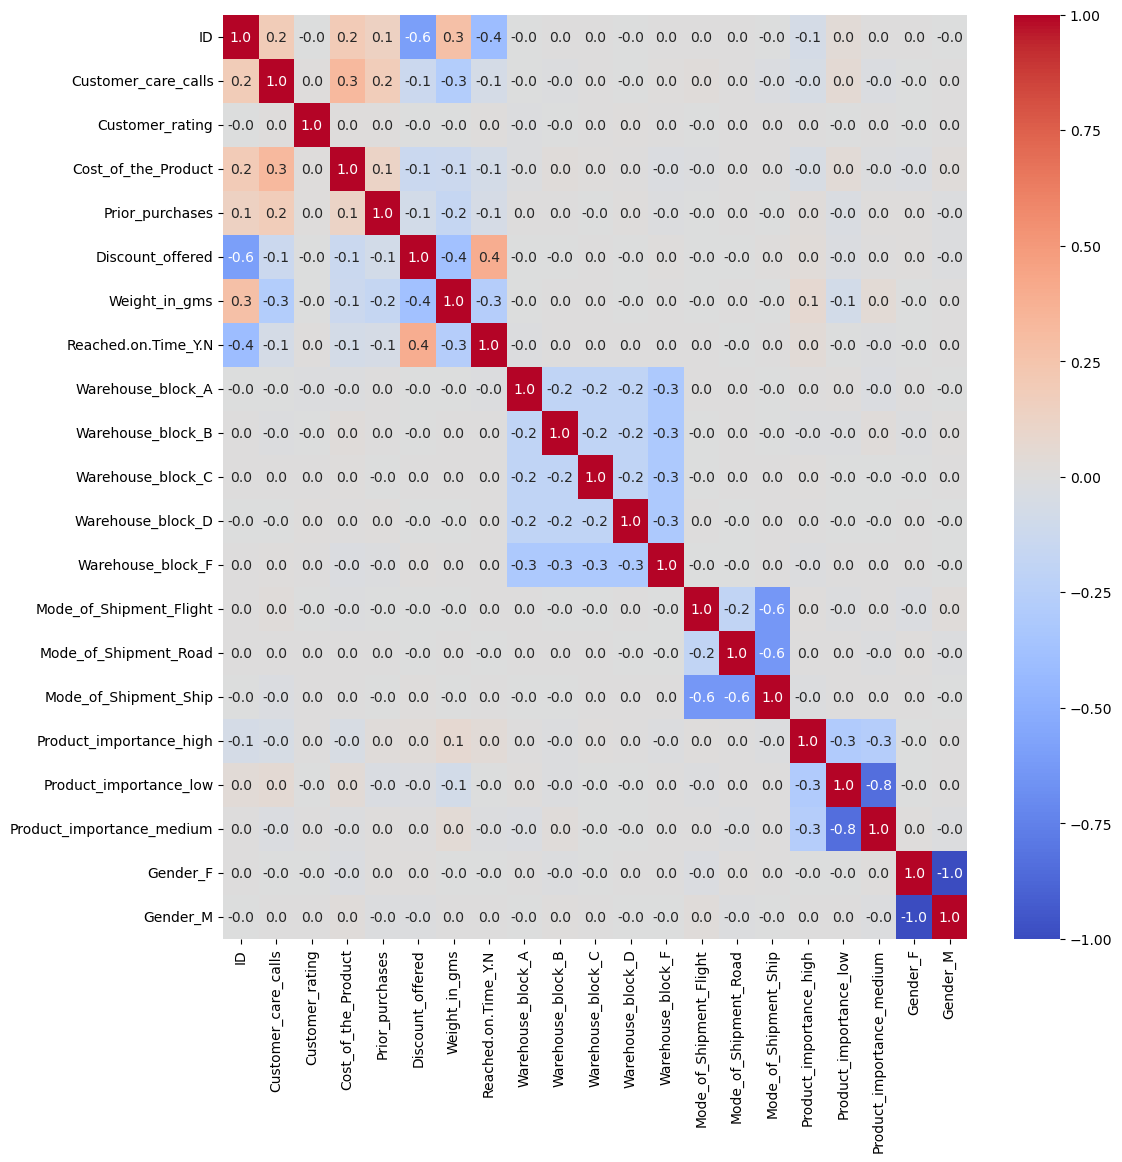

In [18]:
data_matrix_2=data_1.corr()

plt.figure(figsize=(12,12))
sns.heatmap(data_matrix_2,annot=True, cmap='coolwarm', fmt=".1f")

In [19]:
data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [20]:
x=data.groupby(['Warehouse_block','Mode_of_Shipment']).agg({'Weight_in_gms':'mean','Discount_offered':['mean','max','median']})
x

Weight_in_gms Discount_offered           
                                          mean             mean max median
Warehouse_block Mode_of_Shipment                                          
A               Flight             3660.171717        13.050505  65    7.0
                Road               3602.901361        13.163265  65    7.0
                Ship               3607.724638        13.277778  65    7.0
B               Flight             3601.966216        12.584459  64    7.0
                Road               3615.602041        13.037415  65    7.0
                Ship               3648.488335        13.366050  65    7.0
C               Flight             3625.569492        12.725424  64    6.0
                Road               3661.574830        13.748299  65    7.0
                Ship               3640.284566        13.477492  65    7.0
D               Flight             3672.316498        13.208754  65    7.0
                Road               3677.500000        12.496575  65    6.0
                Ship               3607.065863        13.206426  65    7.0
F               Flight             3607.991554        13.697635  65    7.0
                Road               3670.027304        13.027304  65    7.0
                Ship               3642.588424        13.811897  65    7.0

# Removing outliers from data using above data anaylsis.

In [21]:
'''def outlier_fun(df,column,threshold=2):
    m=df[column].mean()
    s=df[column].std()
    indices_to_drop = []
    for i in range(len(df[column])):
        z=(df[column].iloc[i]-m)/s
        if z>= threshold or z<= -threshold:
            indices_to_drop.append(i)
    df = df.drop(indices_to_drop)        
    return df            

for column in data_1.columns:
    data3=outlier_fun(data_1,column)
    print(column)
    '''

'def outlier_fun(df,column,threshold=2):\n    m=df[column].mean()\n    s=df[column].std()\n    indices_to_drop = []\n    for i in range(len(df[column])):\n        z=(df[column].iloc[i]-m)/s\n        if z>= threshold or z<= -threshold:\n            indices_to_drop.append(i)\n    df = df.drop(indices_to_drop)        \n    return df            \n\nfor column in data_1.columns:\n    data3=outlier_fun(data_1,column)\n    print(column)\n    '

In [22]:
'''column_1='Weight_in_gms'
data3=outlier_fun(data_1,column_1)
data3.shape'''

"column_1='Weight_in_gms'\ndata3=outlier_fun(data_1,column_1)\ndata3.shape"

In [23]:
def outlier_fun(df, threshold=3):
    m = df.mean()
    s = df.std()
    z_scores = (df - m) / s
    outliers = (z_scores >= threshold) | (z_scores <= -threshold)
    return df[~outliers.any(axis=1)]

data3 = outlier_fun(data_1)
data3.shape


(9760, 21)

In [24]:
data3.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M'],
      dtype='object')

# Splitting the Dats

In [25]:
X_,Y_=data3[['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Warehouse_block_A', 'Warehouse_block_B',
       'Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F',
       'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road',
       'Mode_of_Shipment_Ship', 'Product_importance_high',
       'Product_importance_low', 'Product_importance_medium', 'Gender_F',
       'Gender_M']],data3[['Reached.on.Time_Y.N']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_,Y_, test_size = 0.2, random_state = 42)

print(Y_.shape,X_.shape)

(9760, 1) (9760, 19)


In [27]:
def evaluate_fun(y_hat,y_pred):
    print("The ROC Accuracy :",roc_auc_score(y_hat,y_pred))
    print("the Accuracy score: ",accuracy_score(y_hat,y_pred))
    conf_matrix=confusion_matrix(y_hat, y_pred)
    
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_matrix, annot=True,cmap='Greens')
    plt.show()

# Classification models
## Logistic Regression

In [28]:
lr = LogisticRegression(penalty='l2', C=0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


/Users/shahzaibrahat/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The ROC Accuracy : 0.6139230084581137
the Accuracy score:  0.6198770491803278


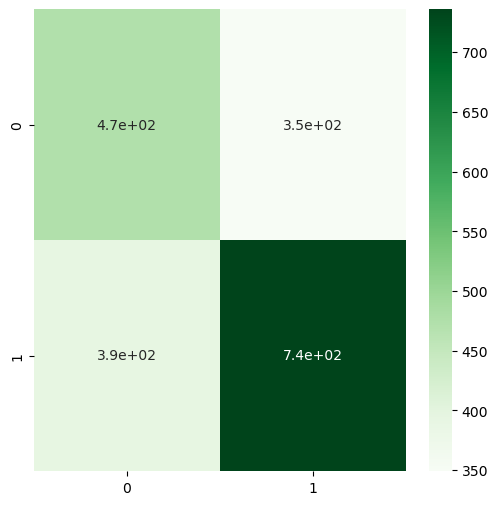

In [29]:
evaluate_fun(y_test,y_pred)

## Random Forest

In [30]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/Users/shahzaibrahat/.local/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The ROC Accuracy : 0.6595789562048587
the Accuracy score:  0.6557377049180327


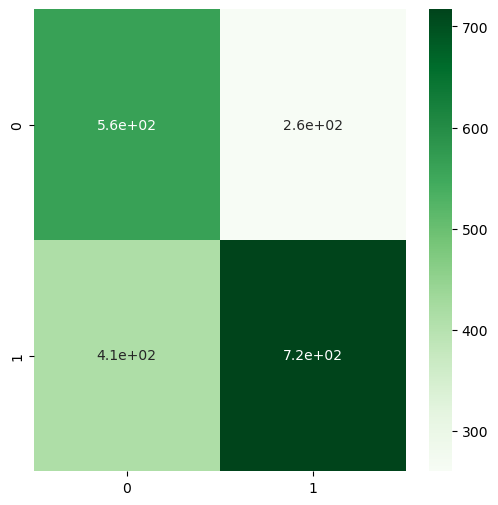

In [31]:
evaluate_fun(y_test,y_pred)

## Cat Boost

In [32]:
cb = CatBoostClassifier(learning_rate=0.00125, verbose=False)
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

The ROC Accuracy : 0.7194244952737237
the Accuracy score:  0.6880122950819673


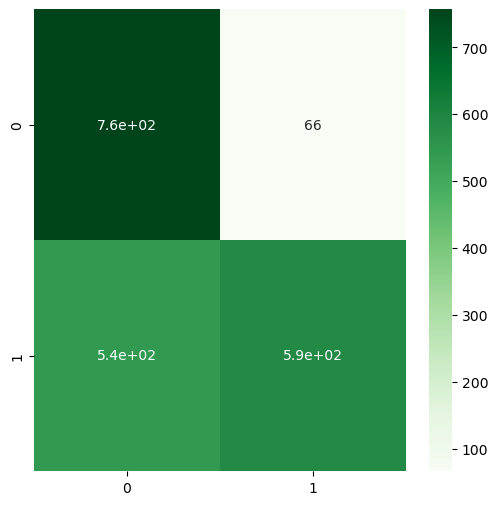

In [33]:
evaluate_fun(y_test,y_pred)